# Plotting tests

This notebook is used to test plotting during development.

In [1]:
import discretisedfield as df
import discretisedfield.util as dfu
%matplotlib inline

### Nanoscale

In [2]:
p1 = (0, 0, 0)
p2 = (1e-9, 1e-9, 0.1e-9)
cell = (0.1e-9, 0.1e-9, 0.05e-9)
mesh = df.Mesh(p1=p1, p2=p2, cell=cell)

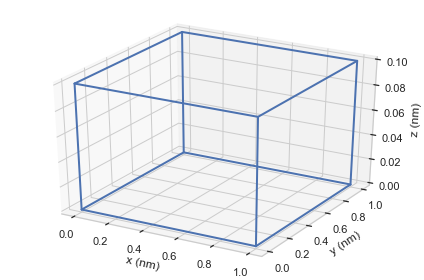

In [3]:
mesh.region.mpl()

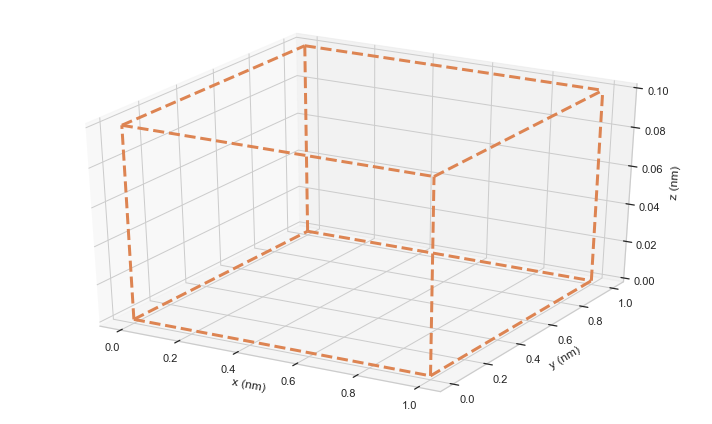

In [4]:
mesh.region.mpl(figsize=(10, 6), multiplier=1e-9,
                color=dfu.color_palette('deep', 10, 'rgb')[1], linewidth=3,
                linestyle='dashed')

In [5]:
mesh.region.k3d()

Output()

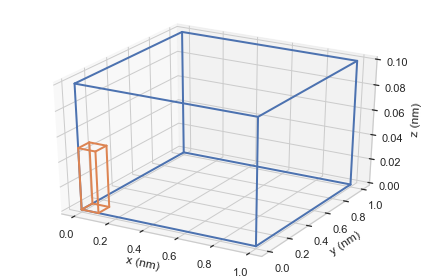

In [6]:
mesh.mpl()

In [7]:
mesh.k3d()

Output()

In [8]:
mesh.k3d_points()

Output()

### Gigascale

In [30]:
p1 = (-50e9, -50e9, 0)
p2 = (50e9, 50e9, 20e9)
region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=(50, 50, 10))

mesh.region.k3d()

Output()

In [31]:
region.k3d(multiplier=1e9,
           color=dfu.color_palette('deep', 10, 'int')[3],
           wireframe=True)

Output()

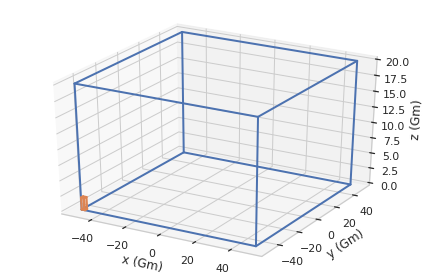

In [32]:
mesh.mpl()

In [34]:
mesh.k3d()

Output()

In [33]:
mesh.k3d_points()

Output()

### Mixed scale

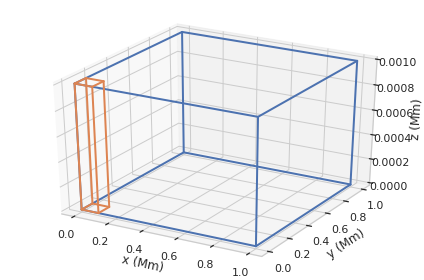

In [35]:
p1 = (0, 0, 0)
p2 = (1e6, 1e6, 1e3)
cell = (0.1e6, 0.1e6, 1e3)
mesh = df.Mesh(p1=p1, p2=p2, cell=cell)
mesh.mpl()

In [36]:
mesh.region.k3d()

Output()

In [37]:
mesh.k3d_points(point_size=0.05)

Output()

### Subregions

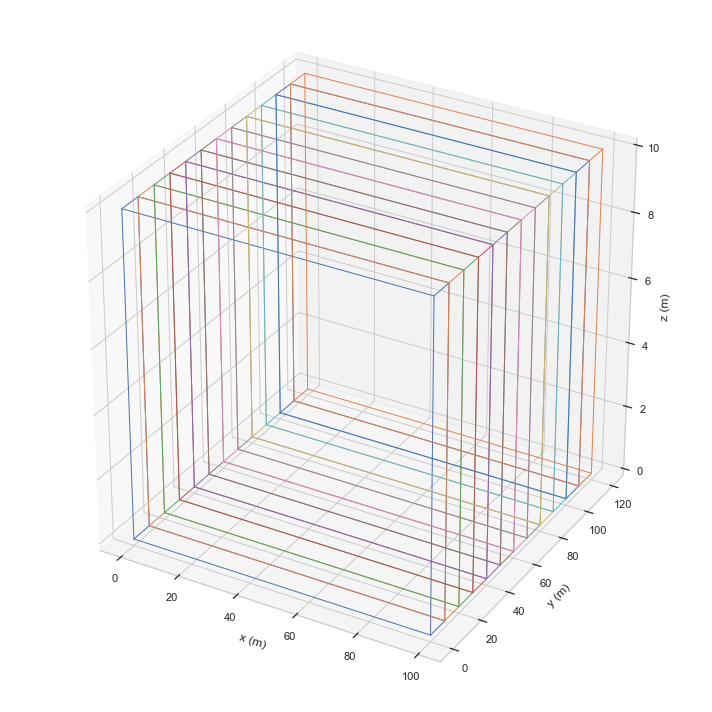

In [2]:
p1 = (0, 0, 0)
p2 = (100, 120, 10)
cell = (2, 2, 2)
subregions = {'r1': df.Region(p1=(0, 0, 0), p2=(100, 10, 10)),
              'r2': df.Region(p1=(0, 10, 0), p2=(100, 20, 10)),
              'r3': df.Region(p1=(0, 20, 0), p2=(100, 30, 10)),
              'r4': df.Region(p1=(0, 30, 0), p2=(100, 40, 10)),
              'r5': df.Region(p1=(0, 40, 0), p2=(100, 50, 10)),
              'r6': df.Region(p1=(0, 50, 0), p2=(100, 60, 10)),
              'r7': df.Region(p1=(0, 60, 0), p2=(100, 70, 10)),
              'r8': df.Region(p1=(0, 70, 0), p2=(100, 80, 10)),
              'r9': df.Region(p1=(0, 80, 0), p2=(100, 90, 10)),
              'r10': df.Region(p1=(0, 90, 0), p2=(100, 100, 10)),
              'r11': df.Region(p1=(0, 100, 0), p2=(100, 110, 10)),
              'r12': df.Region(p1=(0, 110, 0), p2=(100, 120, 10))}
mesh = df.Mesh(p1=p1, p2=p2, cell=cell, subregions=subregions)
mesh.mpl_subregions(figsize=(10, 10), linewidth=1)

In [3]:
mesh.k3d_subregions()

Output()

In [4]:
mesh.k3d_points()

Output()

In [5]:
mesh.subregions['r2'].k3d()

Output()

### Field plotting

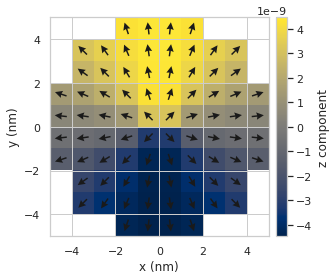

In [62]:
p1 = (-5e-9, -5e-9, -2e-9)
p2 = (5e-9, 5e-9, 10e-9)
cell = (1e-9, 1e-9, 1e-9)
mesh = df.Mesh(p1=p1, p2=p2, cell=cell)

value_fun = lambda pos: (pos[0], pos[1], pos[2]*pos[1])

def norm_fun(pos):
    x, y, z = pos
    if x**2 + y**2 < 5e-9**2:
        return 1
    else:
        return 0
    
field = df.Field(mesh, dim=3, value=value_fun, norm=norm_fun)

field.plane('z').mpl()

In [63]:
field.plane('z').k3d_vectors(color_field=field.x)

Output()

In [64]:
field.x.k3d_voxels(filter_field=field.norm)

Output()

In [67]:
field.plane('z').z.k3d_voxels(filter_field=field.norm)

Output()